In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame as df

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
%load_ext jupyternotify


<IPython.core.display.Javascript object>

In [4]:
data = pd.read_csv("../../data/raw/fifa.csv",  delimiter=',')

## First approach

In [40]:
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [7]:
data = data.drop(columns=['Unnamed: 0'])
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [8]:
data.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


## Missing Values

In [9]:
pd.isnull(data).sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS            

In [10]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.loc[missing_data['Percent'] > 0.08]

,Total,Percent
Loaned From,16943,0.930576
LWB,2085,0.114516
LM,2085,0.114516
CB,2085,0.114516
LCB,2085,0.114516
LB,2085,0.114516
RWB,2085,0.114516
RDM,2085,0.114516
CDM,2085,0.114516
LDM,2085,0.114516


# Filling players attributes

In [13]:
player_features = ['Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Curve', 'SprintSpeed', 
                   'Reactions', 'ShotPower', 'Stamina', 'Strength', 
                   'Positioning', 'Vision', 'Composure',
                   'StandingTackle', 'SlidingTackle',
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties']

In [14]:
for attr in player_features:
    data[attr].fillna(data[attr].mean(), inplace = True)

In [15]:
pd.isnull(data[player_features]).sum()

Acceleration       0
Aggression         0
Agility            0
Balance            0
BallControl        0
Curve              0
SprintSpeed        0
Reactions          0
ShotPower          0
Stamina            0
Strength           0
Positioning        0
Vision             0
Composure          0
StandingTackle     0
SlidingTackle      0
Crossing           0
Dribbling          0
FKAccuracy         0
Finishing          0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
HeadingAccuracy    0
Interceptions      0
Jumping            0
LongPassing        0
LongShots          0
Marking            0
Penalties          0
dtype: int64

# Filling players physical information

In [111]:
data['Weight'].fillna('200lbs', inplace = True)
data['Weight'] = data['Weight'].str.slice(0,-3,1).astype(float)
data['Weight'] = data['Weight'].apply(lambda x: int(x / 2.2046))

data['Height'].fillna("5'11", inplace = True)

In [32]:
data['Body Type'].fillna('Normal', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)

# Filling players public information

In [29]:
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Position'].fillna('Undefined', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['International Reputation'].fillna(1, inplace = True)

# Visualization

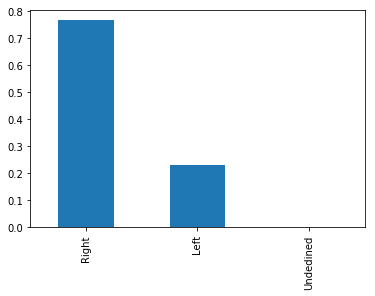

In [33]:
data['Preferred Foot'].value_counts(normalize=True).plot.bar()

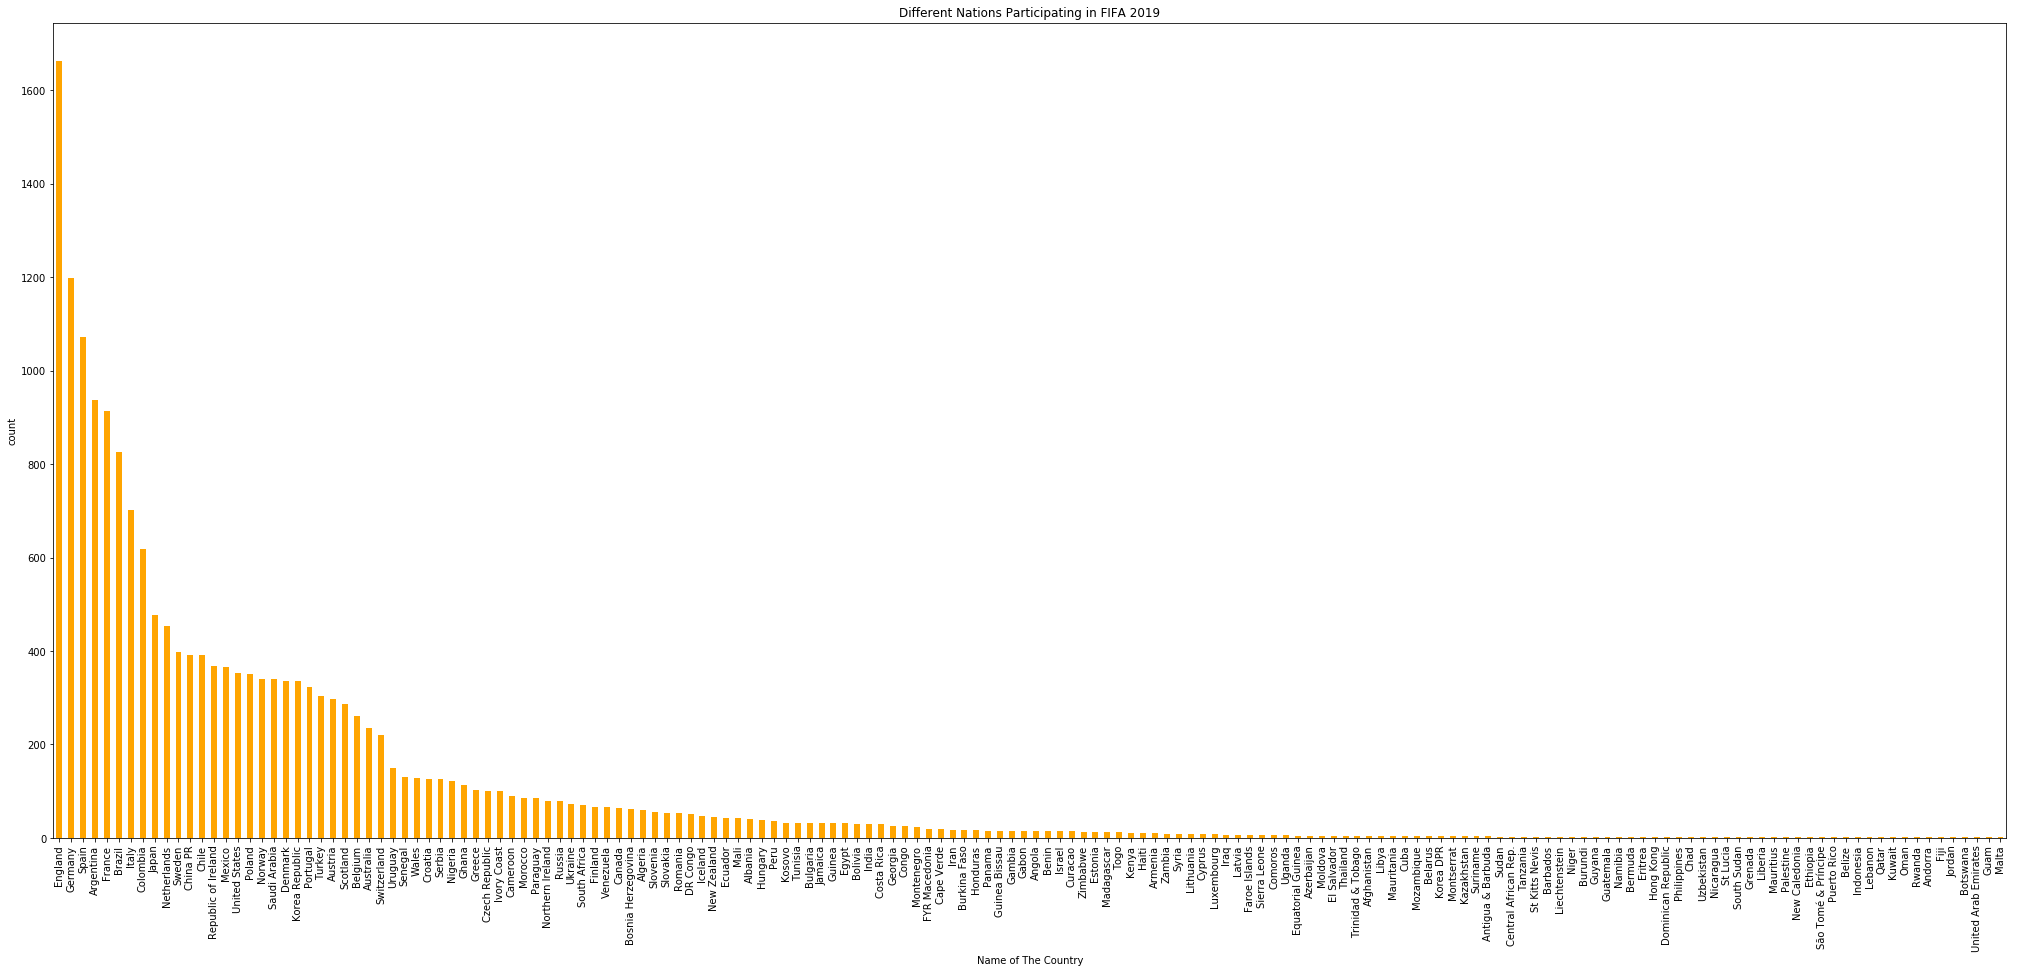

In [24]:
data['Nationality'].value_counts().plot.bar(color = 'orange', figsize=(35, 15))
plt.title('Different Nations Participating in FIFA 2019')
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

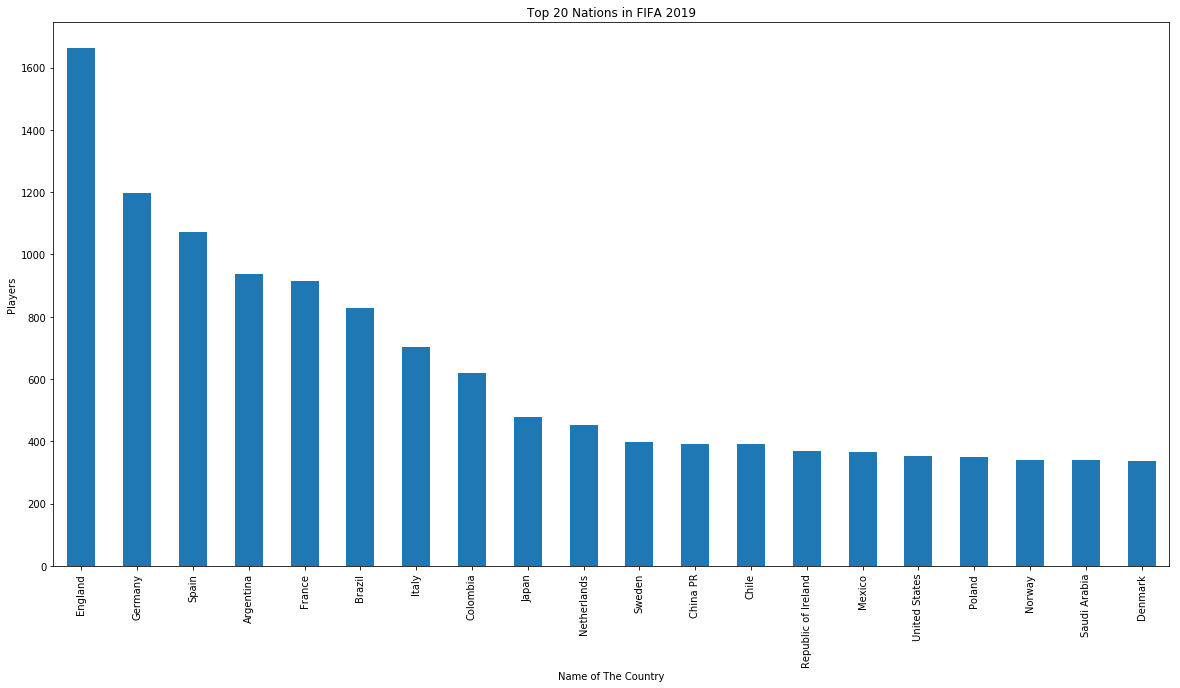

In [26]:
data['Nationality'].value_counts()[:20].plot.bar(figsize=(20, 10))
plt.title('Top 20 Nations in FIFA 2019')
plt.xlabel('Name of The Country')
plt.ylabel('Players')
plt.show()

ST           0.118196
GK           0.111221
CB           0.097655
CM           0.076564
LB           0.072609
RB           0.070907
RM           0.061734
LM           0.060142
CAM          0.052617
CDM          0.052068
RCB          0.036360
LCB          0.035591
LCM          0.021695
RCM          0.021475
LW           0.020926
RW           0.020322
RDM          0.013621
LDM          0.013347
LS           0.011369
RS           0.011150
RWB          0.004778
LWB          0.004284
CF           0.004064
Undefined    0.003295
RAM          0.001153
LAM          0.001153
RF           0.000879
LF           0.000824
Name: Position, dtype: float64


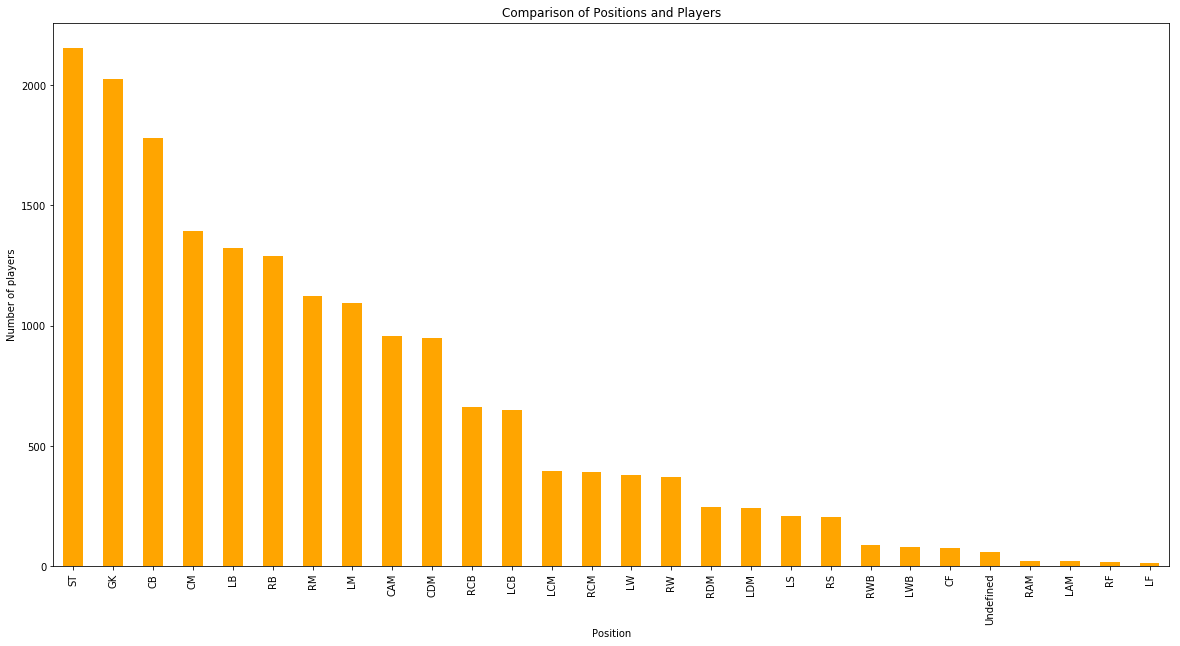

In [38]:
print(data['Position'].value_counts(normalize=True))
data['Position'].value_counts().plot.bar(color = 'orange', figsize=(20, 10))
plt.title('Comparison of Positions and Players')
plt.xlabel('Position')
plt.ylabel('Number of players')
plt.show()

# Features correlation

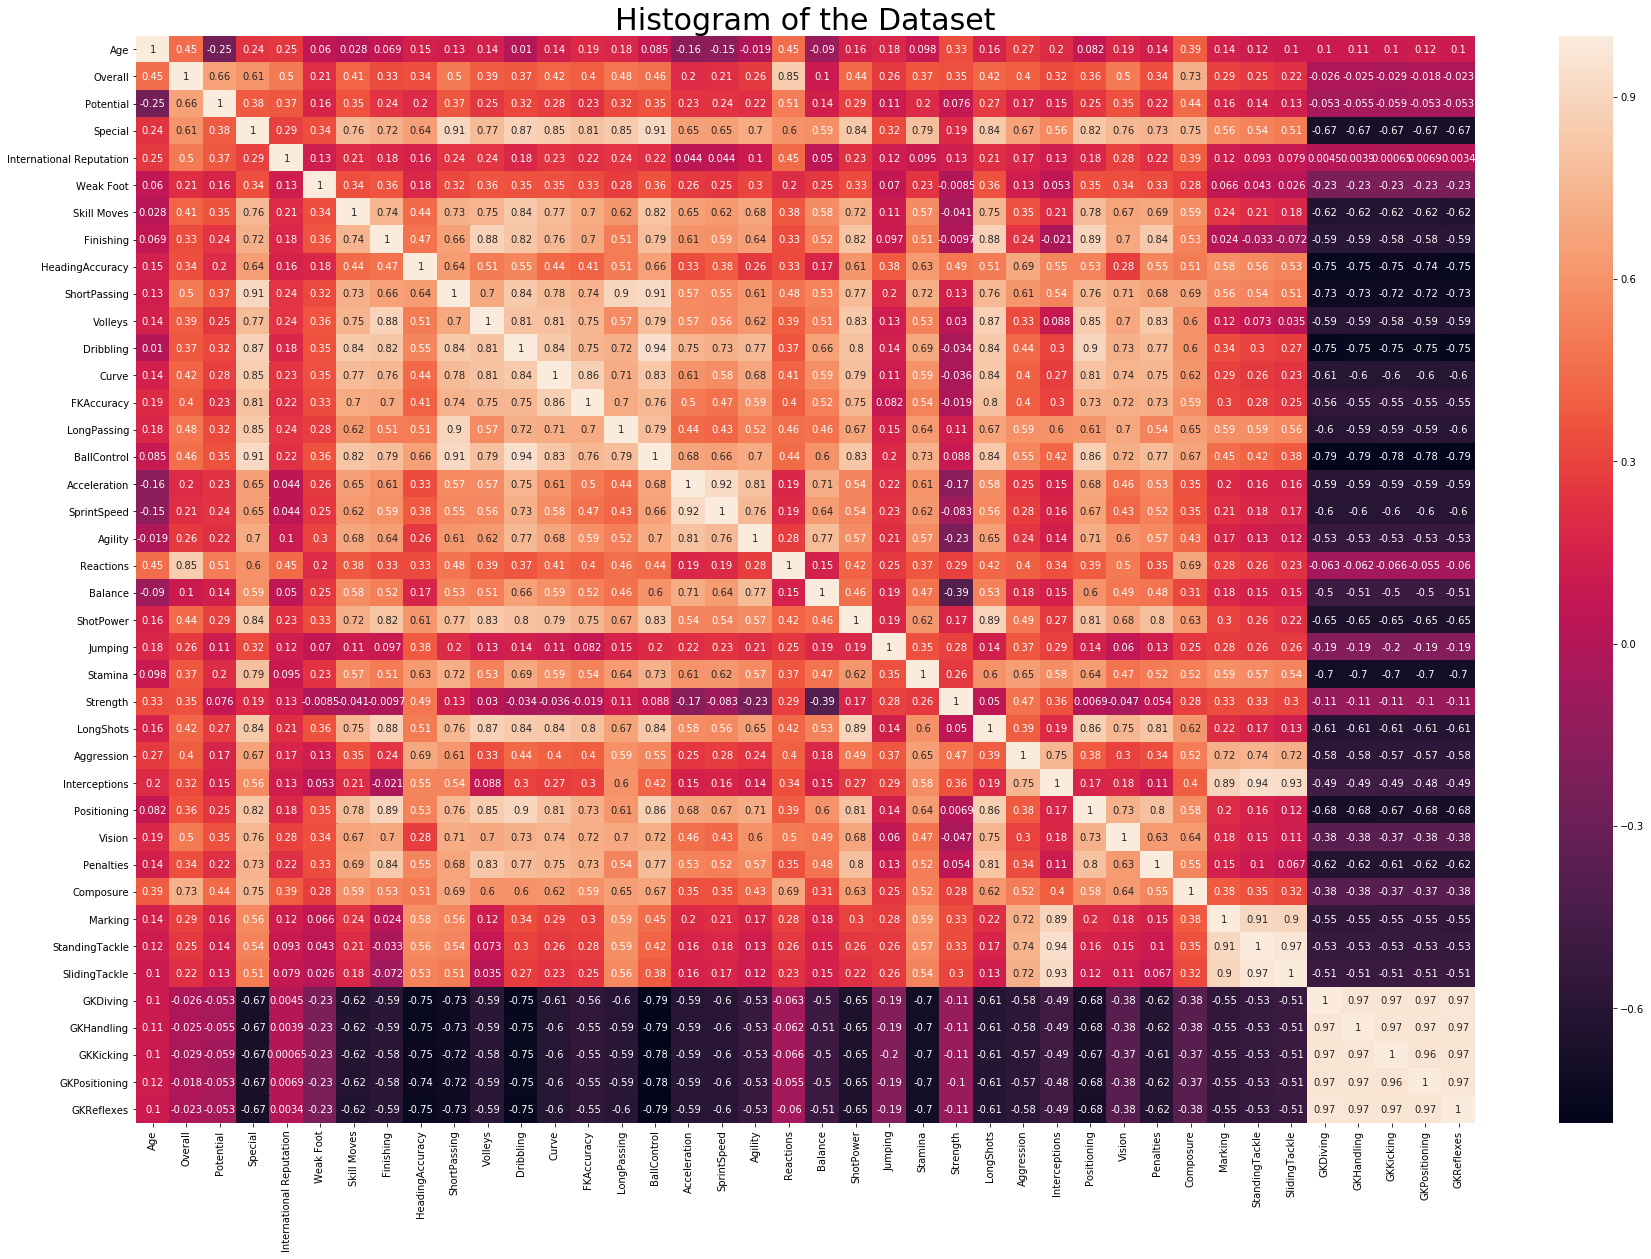

In [35]:
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(data[['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']].corr(), annot = True)

plt.title('Histogram of the Dataset', fontsize = 30)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01381abb38>,
      dtype=object)

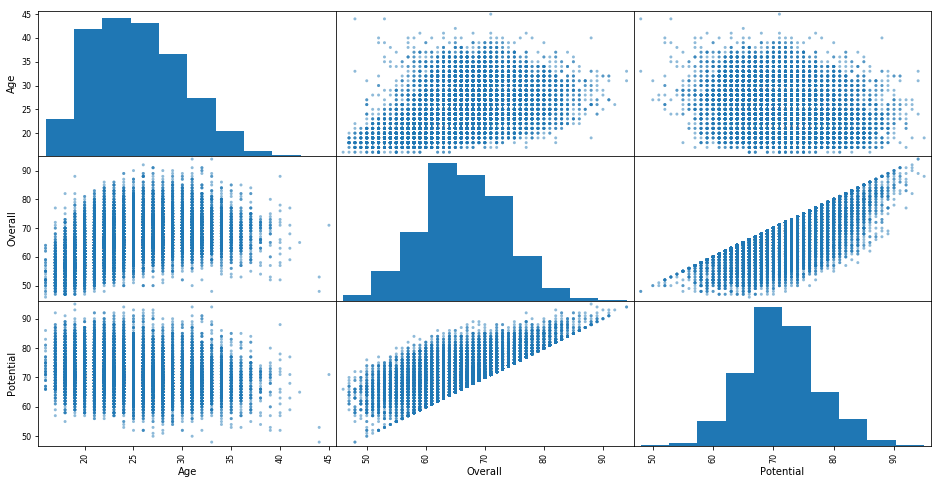

In [29]:
from pandas.plotting import scatter_matrix
attributes = ["Value", "Age", "Overall",
"Potential"]
scatter_matrix(data[attributes], figsize=(16, 8))